## TNT Shipment Tracker - Multiple Search (30)

### Import required Python libraries and modules

In [1]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
import os
from IPython.display import display, Markdown, HTML
import matplotlib.pyplot as plt
import seaborn as sns
#import time

### Set paths to files

Especifica les rutes d'accés per les següents variables:
(per més eficiència t'ho poso tot aquí al principi per no haver d'anar amunt i avall)

In [2]:
# Path to your Tests macro excel file
excel_tests_file_path = "./Shipment_Data/Testsinmacro_2.xlsx"

# Path to your Chromedriver
chromedriver_path='/Users/albertlleidaestival/Projects/TNT-Shipment-Tracker/ChromeDriver/chromedriver-mac-arm64/chromedriver'

# Path to the folder where you want to save the report file
folder_save_to_excel_path = "./TNT Track Reports"

### Extract shipments data from Excel file and create chunked url (up 30 shipment numbers)

Importarem la funció del document **functions_extract.py**.

Funció **extract_and_create_urls**:

- Primer, extreu les dades de l'arxiu Tests macro d'excel i les filtra per Carrier = TNT i Status != DELIVERED.

- Després crea un llistat dels números d'enviaments (únics), els agrupa de 30 en 30 i construeix les urls que es consultaràn a la web de TNT.   

In [3]:
# Import customized functions from functions_extract.py file
from functions_extract import extract_and_create_urls

In [4]:
# Call function extract_and_create_urls
url_list, unique_references = extract_and_create_urls(excel_tests_file_path)

 --> In your Excel file there are **111 unique shipment numbers** (106 'In Transit' and 5 'Exception'). 

--> Chunked URLs to be consulted: **4** 

### Web Scraping TNT

Importarem les funcions ara del document **functions_web_scraping.py**.

- **Scrape_structure_from_urls**: guarda en la variable all_shipment_divs tota la informació de cada url consultada.

In [5]:
# Import customized functions from functions_web_scraping.py file
from functions_web_scraping import scrape_structure_from_urls, scrape_shipment_data

# New function to scrap again if not all shipment numbers are found in all_shipment_divs
from functions_web_scraping import review_structure_scraped

In [6]:
# Call function scrape_structure_from_urls
all_shipment_divs = scrape_structure_from_urls(url_list, chromedriver_path)

--> Elapsed time scraping data: **110.83 seconds**

In [7]:
# Apply function to scrap again if not all shipment numbers are found in all_shipment_divs
all_shipment_divs = review_structure_scraped(unique_references, all_shipment_divs, url_list, chromedriver_path)

--> Expected number of shipments: **111**

--> Reviewing extracted data...

--> Attempt 1 Succeeded: Found 111 out of 111 shipments.

**All shipment numbers in your Excel file are present in the scraped data.**

--> Elapsed time reviewing scraped data: **13.11 seconds**

In [8]:
# Call function scrape_shipment_data
df = scrape_shipment_data(all_shipment_divs)

# Print first output
display(df.head(), df.tail())
display(df.info())

,Client Reference,Shipment Number,TNT Status,Shipment Origin Date,Shipment Destination,Last Update,Last Location,Last Action,TNT Exception Notification
0,DSD/121190,607252040,En entrega,18 de octubre de 2023,"Laval, France",20/10/23 14:53,Change,El envío está en camino.,
1,DSD/120004,607247685,En tránsito,16 de octubre de 2023,"Lahonce, France",18/10/23 13:57,,Envío retrasado en tránsito. Acciones de recup...,EXCEPTION ALERT
2,DSD/120754,607250021,En tránsito,17 de octubre de 2023,"La Ferriere, France",19/10/23 22:48,,Envío retrasado en tránsito. Acciones de recup...,EXCEPTION ALERT
3,DSD/120830,607250344,En tránsito,17 de octubre de 2023,"Fonbeauzard, France",18/10/23 8:55,,Envío retrasado en tránsito. Acciones de recup...,EXCEPTION ALERT
4,DSD/120206,607248164,En tránsito,16 de octubre de 2023,"Lahonce, France",26/10/23 7:34,Blagnac,El envío llegó al punto de conexión,


,Client Reference,Shipment Number,TNT Status,Shipment Origin Date,Shipment Destination,Last Update,Last Location,Last Action,TNT Exception Notification
106,DSD/121662,607254292,Entregado,19 de octubre de 2023,"Tonneins, France",23/10/23 10:50,Le Passage,Envío entregado en buen estado,
107,DSD/121682,607254417,Entregado,19 de octubre de 2023,"Sarlat La Caneda, France",23/10/23 11:20,Marsac Sur L Isle,Envío entregado en buen estado,
108,DSD/121648,607254332,Entregado,19 de octubre de 2023,"Valenton, France",23/10/23 15:43,Creteil,Envío entregado en buen estado,
109,DSD/121652,607254235,Entregado,19 de octubre de 2023,"Ales, France",24/10/23 8:28,Nimes,Envío entregado en buen estado,
110,DSD/121684,607254425,Entregado,19 de octubre de 2023,"Furiani, France",24/10/23 12:47,Borgo,Envío entregado en buen estado,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Client Reference            111 non-null    object
 1   Shipment Number             111 non-null    object
 2   TNT Status                  111 non-null    object
 3   Shipment Origin Date        111 non-null    object
 4   Shipment Destination        111 non-null    object
 5   Last Update                 111 non-null    object
 6   Last Location               111 non-null    object
 7   Last Action                 111 non-null    object
 8   TNT Exception Notification  111 non-null    object
dtypes: object(9)
memory usage: 7.9+ KB


None

### Process and transform original DataFrame

In [9]:
# Create a copy of the DataFrame to perform changes
processed_df = df.copy()

Importarem les funcions des de **functions_process_df.py**.

- **global_df_transformations**: engloba i aplica totes les funcions "menors" que modifiquen els tipus i formats dels valors, així com l'estructura de les columnes i el mateix dataframe. Segueix la següent lògica:

     1. processed_df = convert_shipment_origin_date(processed_df)
     2. processed_df = process_last_update_column(processed_df)
     3. processed_df = calculate_processing_days(processed_df)
     4. processed_df = format_dates_and_processing_days(processed_df)
     5. processed_df, excel_file_path = rearrange_columns_and_save_to_excel(processed_df,folder_save_to_excel_path)

In [10]:
# Import customized functions from functions_process.py file
from functions_process_df import convert_shipment_origin_date, process_last_update_column
from functions_process_df import calculate_processing_days, format_dates_and_processing_days
from functions_process_df import rearrange_columns_and_save_to_excel, global_df_transformation

In [11]:
# Apply the function global_df_transformations
processed_df, excel_file_path = global_df_transformation(df, folder_save_to_excel_path)

--> Excel file saved at: ./TNT Track Reports/TNT Track Report 28-11-2023 22_14_53.xlsx

### TNT Shipment Track Report

In [12]:
processed_df

,Client Reference,Shipment Number,TNT Status,Shipment Origin Date,Shipment Destination,Processing Days,Last Update,Last Location,Last Action,TNT Exception Notification
0,DSD/121190,607252040,En entrega,18/10/23,"Laval, France",41 days,20/10/23,Change,El envío está en camino.,
1,DSD/120004,607247685,En tránsito,16/10/23,"Lahonce, France",43 days,18/10/23,,Envío retrasado en tránsito. Acciones de recup...,EXCEPTION ALERT
2,DSD/120754,607250021,En tránsito,17/10/23,"La Ferriere, France",42 days,19/10/23,,Envío retrasado en tránsito. Acciones de recup...,EXCEPTION ALERT
3,DSD/120830,607250344,En tránsito,17/10/23,"Fonbeauzard, France",42 days,18/10/23,,Envío retrasado en tránsito. Acciones de recup...,EXCEPTION ALERT
4,DSD/120206,607248164,En tránsito,16/10/23,"Lahonce, France",43 days,26/10/23,Blagnac,El envío llegó al punto de conexión,
...,...,...,...,...,...,...,...,...,...,...
106,DSD/121662,607254292,Entregado,19/10/23,"Tonneins, France",4 days,23/10/23,Le Passage,Envío entregado en buen estado,
107,DSD/121682,607254417,Entregado,19/10/23,"Sarlat La Caneda, France",4 days,23/10/23,Marsac Sur L Isle,Envío entregado en buen estado,
108,DSD/121648,607254332,Entregado,19/10/23,"Valenton, France",4 days,23/10/23,Creteil,Envío entregado en buen estado,
109,DSD/121652,607254235,Entregado,19/10/23,"Ales, France",5 days,24/10/23,Nimes,Envío entregado en buen estado,


In [15]:
# Import customized functions from functions_z_extra.py file
from functions_z_extra import (plot_tnt_status_bar,
                               display_exception_shipments,
                               check_inconsistencies, display_url_list)

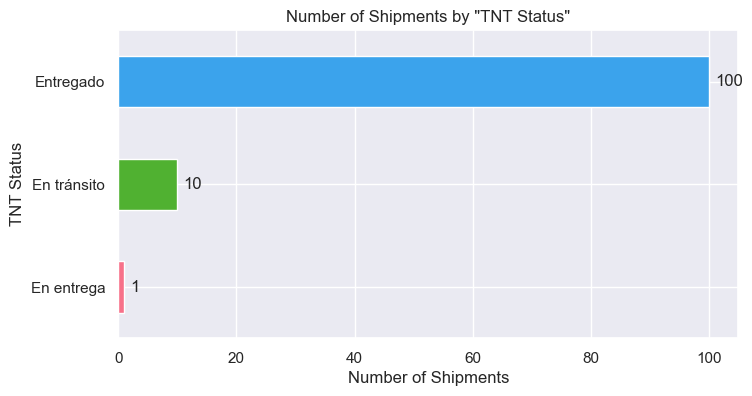

In [16]:
# Function to plot 'TNT Status' unique count
plot_tnt_status_bar(processed_df)

### TNT Exception Notification Detected

In [17]:
# Apply function display_exception_shipments
exception_df = display_exception_shipments(processed_df)
exception_df

**3 Exception Notification detected!**

,Shipment Number,TNT Exception Notification,URL
1,607247685,EXCEPTION ALERT,Link
2,607250021,EXCEPTION ALERT,Link
3,607250344,EXCEPTION ALERT,Link


,Client Reference,Shipment Number,TNT Status,Shipment Origin Date,Shipment Destination,Processing Days,Last Update,Last Location,Last Action,TNT Exception Notification,URL
1,DSD/120004,607247685,En tránsito,16/10/23,"Lahonce, France",43 days,18/10/23,,Envío retrasado en tránsito. Acciones de recup...,EXCEPTION ALERT,https://www.tnt.com/express/es_es/site/herrami...
2,DSD/120754,607250021,En tránsito,17/10/23,"La Ferriere, France",42 days,19/10/23,,Envío retrasado en tránsito. Acciones de recup...,EXCEPTION ALERT,https://www.tnt.com/express/es_es/site/herrami...
3,DSD/120830,607250344,En tránsito,17/10/23,"Fonbeauzard, France",42 days,18/10/23,,Envío retrasado en tránsito. Acciones de recup...,EXCEPTION ALERT,https://www.tnt.com/express/es_es/site/herrami...


### Inconsistencies

In [18]:
# Apply function check_inconsistencies
check_inconsistencies(excel_tests_file_path, df)

Original Length: 111
Extracted DataFrame Length: 111
Difference in Length: 0

Shipment numbers to check:


,LOGIS ID,Carrier,T&T reference,Status
0,DSD121598,TNT,607253941,IN TRANSIT


In [19]:
df_missing = check_inconsistencies(excel_tests_file_path, df)
df_missing

Original Length: 111
Extracted DataFrame Length: 111
Difference in Length: 0

Shipment numbers to check:


,LOGIS ID,Carrier,T&T reference,Status
0,DSD121598,TNT,607253941,IN TRANSIT


In [20]:
df_missing = check_inconsistencies(excel_tests_file_path, df)
df_missing

for reference in df_missing['T&T reference']:
    for i, url_chunk in enumerate(url_list, start=1):
        if str(reference) in url_chunk:
            print(f'T&T reference {reference} is in URL chunk {i}')
            break


Original Length: 111
Extracted DataFrame Length: 111
Difference in Length: 0

Shipment numbers to check:
T&T reference 607253941 is in URL chunk 3


### Linkable URLs

In [21]:
display_url_list(url_list)

'1. https://www.tnt.com/express/es_es/site/herramientas-envio/seguimiento.html?searchType=con&cons=607245928,607245931,607245945,607245959,607245980,607247521,607247685,607247711,607248164,607248368,607248399,607248487,607249584,607250021,607250239,607250344,607250551,607251089,607251512,607251526,607251574,607251591,607251764,607251778,607251804,607251870,607252040,607252190,607252274,607252380'

'2. https://www.tnt.com/express/es_es/site/herramientas-envio/seguimiento.html?searchType=con&cons=607252464,607252478,607252481,607252495,607252549,607252570,607252583,607252610,607252623,607252685,607252756,607252773,607252827,607252932,607252950,607252963,607253045,607253147,607253178,607253266,607253306,607253354,607253385,607253408,607253411,607253527,607253544,607253558,607253615,607253629'

'3. https://www.tnt.com/express/es_es/site/herramientas-envio/seguimiento.html?searchType=con&cons=607253646,607253677,607253694,607253748,607253751,607253782,607253924,607253941,607253955,607253969,607253986,607253990,607254006,607254010,607254023,607254037,607254045,607254054,607254085,607254099,607254108,607254111,607254125,607254139,607254142,607254156,607254160,607254173,607254187,607254195'

'4. https://www.tnt.com/express/es_es/site/herramientas-envio/seguimiento.html?searchType=con&cons=607254200,607254227,607254235,607254244,607254258,607254275,607254289,607254292,607254301,607254315,607254329,607254332,607254346,607254350,607254363,607254377,607254385,607254394,607254403,607254417,607254425'